# Final Exam
ANALYST: Fan Li

DUE DATE: Dec 10, 2020

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

###### Part 1: Data Preparation

2. read in data (path varys), specify '-999' and 'spam' as missing values

In [2]:
phd=pd.read_csv("../data/phd_salary_final.csv", index_col='id',na_values=[-999,'spam'])

In [3]:
# check phd
phd.head()

,time,tenure,publications,citations,salary
id,,,,,
T1291,5.0,assoc,NaN,33,47212
T1244,6.0,assoc,3.0,26,54511
T1300,6.0,assoc,3.0,36,41195
T1293,5.0,assoc,5.0,42,53650
T1265,7.0,assoc,6.0,18,53740


3. Fill any missing values with the mean of the column in which they appear

In [4]:
round(phd.mean())

time                7.0
publications       18.0
citations          40.0
salary          54816.0
dtype: float64

In [5]:
phd.fillna(round(phd.mean()),inplace=True)
phd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, T1291 to T1266
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   time          62 non-null     float64
 1   tenure        62 non-null     object 
 2   publications  62 non-null     float64
 3   citations     62 non-null     int64  
 4   salary        62 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 2.9+ KB


4. Change the tenure column type from “object” to “category.”

In [6]:
phd['tenure']=phd['tenure'].astype('category')
phd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, T1291 to T1266
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   time          62 non-null     float64 
 1   tenure        62 non-null     category
 2   publications  62 non-null     float64 
 3   citations     62 non-null     int64   
 4   salary        62 non-null     int64   
dtypes: category(1), float64(2), int64(2)
memory usage: 2.6+ KB


###### Part 2: Subsetting, Plotting, and Aggregating

5. Use a conditional statement to subset the rows representing faculty members with 
more than 40 publications. Save these rows in an object named “phd_sub” and display them

In [7]:
phd_sub=phd[phd['publications']>40]
phd_sub

,time,tenure,publications,citations,salary
id,,,,,
T1270,7.0,assoc,41.0,35,42162
T1250,10.0,full,48.0,56,61100
T1295,16.0,full,50.0,31,66784
T1290,16.0,full,50.0,55,83503
T1266,13.0,full,69.0,90,75822


6. Use “groupby” to display the totals of all columns for each tenure category.

In [8]:
phd_sub.groupby('tenure').sum()

,time,publications,citations,salary
tenure,,,,
assoc,7.0,41.0,35,42162
asst,0.0,0.0,0,0
full,55.0,217.0,232,287209


7. Use seaborn to create a scatterplot (using all 62 rows of phd)

In [13]:
phd['time'].value_counts()

5.0     10
3.0      9
7.0      7
4.0      6
6.0      5
9.0      4
8.0      4
16.0     3
11.0     3
1.0      3
10.0     2
13.0     2
2.0      2
21.0     1
18.0     1
Name: time, dtype: int64

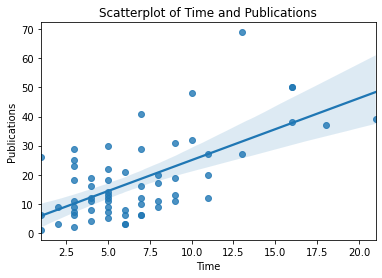

In [9]:
sns.regplot(data=phd,x='time',y='publications')
plt.title("Scatterplot of Time and Publications")
plt.ylabel("Publications")
plt.xlabel("Time");

###### Part 3: Regression

8. Create a regression model using the “statsmodels formula” library we used 
previously. Start by using time, publications, and citations to predict salary. 
Based upon those results, explain in a markdown cell what changes need to be made in your 
model specification to improve the model, and run the modified code in a new code cell. Be 
sure to display the regression results for each model specification you run.

In [10]:
# phd is used
# build model
model = smf.ols(formula='salary ~ time+publications+citations', data=phd)
results=model.fit()
# Inspect the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     19.42
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           7.73e-09
Time:                        14:53:16   Log-Likelihood:                -635.10
No. Observations:                  62   AIC:                             1278.
Df Residuals:                      58   BIC:                             1287.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3.897e+04   2394.308     16.275      0.000    3.42e+04    4.38e+04
time           874.4614    283.895      3.080      0.003     306.184    1442.739
publications    93.6079     85.348      1.097      0.277     -77.235     264.451
citations      204.0602     56.972      3.582      0.001      90.019     318.102
==============================================================================
Omnibus:                        4.126   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.171
Skew:                           0.485   Prob(JB):                        0.205
Kurtosis:                       3.534   Cond. No.                         130.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P-value of `publications` is 0.277, which is greater than 0.025 and indicates `publications` is not a statistically significant variable for predicting `salary`. Therefor it should be omitted.

In [11]:
# build model
model = smf.ols(formula='salary ~ time+citations', data=phd)
results=model.fit()
# Inspect the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     28.43
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           2.26e-09
Time:                        14:53:16   Log-Likelihood:                -635.74
No. Observations:                  62   AIC:                             1277.
Df Residuals:                      59   BIC:                             1284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.907e+04   2396.474     16.305      0.000    3.43e+04    4.39e+04
time        1061.7642    227.176      4.674      0.000     607.187    1516.342
citations    212.1116     56.594      3.748      0.000      98.867     325.356
==============================================================================
Omnibus:                        5.815   Durbin-Watson:                   1.686
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.045
Skew:                           0.531   Prob(JB):                       0.0803
Kurtosis:                       3.909   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""